# Lung Cancer Classification

In this notebook, we predict the presence of lung cancer by using binary classification based on several continuous and categorical variables. 10 Machine Learning models were trained and evaluated on the Lung Cancer public dataset from kaggle: https://www.kaggle.com/datasets/mysarahmadbhat/lung-cancer.

In [174]:
import pandas as pd
print(pd.__version__)

2.2.0


In [175]:
df = pd.read_csv('data\\survey lung cancer.csv')

### Data Inspection

In [176]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [177]:
df.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

We notice that some columns have trailing spaces. We will stip the strings and also store the list of predictor variables to reuse later.

In [178]:
df.columns = df.columns.str.strip()

# We will store the predictor variables for reuse
predictor_variables = ['GENDER',
    'AGE',                 
    'SMOKING',
    'YELLOW_FINGERS',
    'ANXIETY',
    'PEER_PRESSURE',
    'CHRONIC DISEASE',
    'FATIGUE',
    'ALLERGY',
    'WHEEZING',
    'ALCOHOL CONSUMING',
    'COUGHING',
    'SHORTNESS OF BREATH',
    'SWALLOWING DIFFICULTY',
    'CHEST PAIN']

df.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [180]:
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [181]:
# Some analysis of numerical columns
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [182]:
males = df[df['GENDER'] == 'M']
males

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
6,M,52,2,1,1,1,1,2,1,2,2,2,2,1,2,YES
9,M,53,2,2,2,2,2,1,2,1,2,1,1,2,2,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,M,51,1,2,1,1,2,2,2,2,2,2,2,1,2,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [183]:
has_cancer = df[df['LUNG_CANCER'] == 'YES']
has_cancer

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
5,F,75,1,2,1,1,2,2,2,2,1,2,2,1,1,YES
6,M,52,2,1,1,1,1,2,1,2,2,2,2,1,2,YES
7,F,51,2,2,2,2,1,2,2,1,1,1,2,2,1,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [184]:
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

There are no null values in the dataset.

In [185]:
df.duplicated().sum()

33

There are 33 duplicate values in the dataset. We can drop them

In [186]:
df.drop_duplicates(inplace=True)

In [187]:
df.shape

(276, 16)

In [188]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Analyzing Data Distribution

I want to analyze the distribution of the age column, and see what kind of distribution it has.

(array([ 1.,  0.,  2.,  6., 18., 81., 83., 56., 26.,  3.]),
 array([21. , 27.6, 34.2, 40.8, 47.4, 54. , 60.6, 67.2, 73.8, 80.4, 87. ]),
 <BarContainer object of 10 artists>)

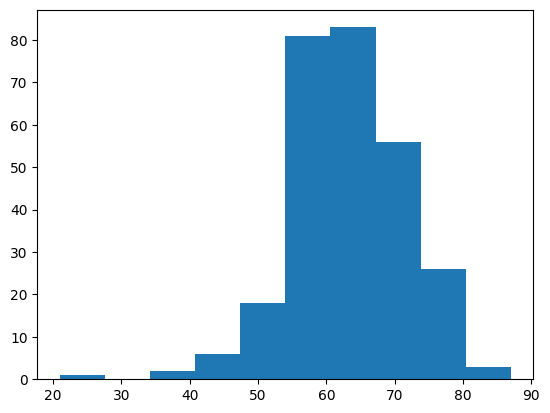

In [189]:
plt.hist(df["AGE"], bins = 10)

We can see some outliers between age 20-30. Let's see what the data looks like without the outliers.

(array([ 2.,  6., 14., 46., 69., 53., 52., 27.,  5.,  1.]),
 array([38. , 42.9, 47.8, 52.7, 57.6, 62.5, 67.4, 72.3, 77.2, 82.1, 87. ]),
 <BarContainer object of 10 artists>)

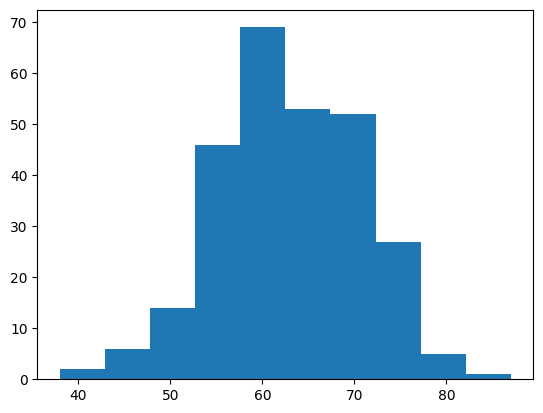

In [190]:
filtered_df = df[(df["AGE"] <= 20) | (df["AGE"] >= 30)]

plt.hist(filtered_df["AGE"], bins = 10)

The age does not follow a perfect normal distribution, but if we randomly take 10 people and take their averaged age and repeat it 2000 tinmes, the averaged age looks like a normal distribution.

(array([  2.,   0.,   0.,   6.,   6.,  15.,  23.,  35.,  55.,  68., 117.,
        109., 140., 158., 203., 191., 189., 136., 146., 126.,  83.,  63.,
         58.,  27.,  23.,  11.,   5.,   1.,   0.,   4.]),
 array([54.1       , 54.68333333, 55.26666667, 55.85      , 56.43333333,
        57.01666667, 57.6       , 58.18333333, 58.76666667, 59.35      ,
        59.93333333, 60.51666667, 61.1       , 61.68333333, 62.26666667,
        62.85      , 63.43333333, 64.01666667, 64.6       , 65.18333333,
        65.76666667, 66.35      , 66.93333333, 67.51666667, 68.1       ,
        68.68333333, 69.26666667, 69.85      , 70.43333333, 71.01666667,
        71.6       ]),
 <BarContainer object of 30 artists>)

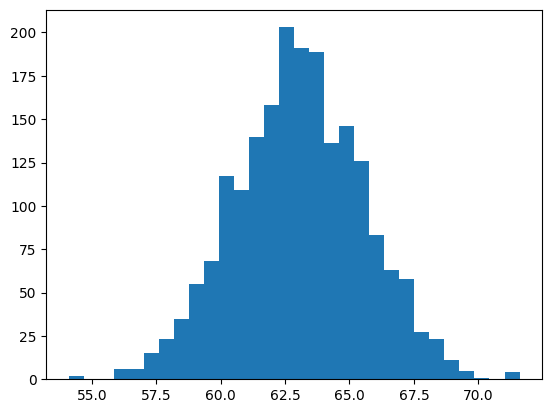

In [191]:
average_ages = []
for i in range(2000):
  ave_age = filtered_df["AGE"].sample(10).sum() / 10
  average_ages.append(ave_age)

plt.hist(average_ages, bins = 30)

Let's keep the outliers for training our models for now.

### Data Visualization

Let's visualize some data to see if we can form any hypotheses.

In [192]:
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,F,59,1,2,2,2,1,1,2,2,1,2,1,2,1,YES
280,F,59,2,1,1,1,2,2,2,1,1,1,2,1,1,NO
281,M,55,2,1,1,1,1,2,2,1,1,1,2,1,2,NO
282,M,46,1,2,2,1,1,1,1,1,1,1,1,2,2,NO


### Exploratory Data Analysis

Let's separate the continuous and categorical columns.

In [193]:
con_col = ['AGE']
cat_col=[]
for i in df.columns:
    if i!='AGE':
        cat_col.append(i)

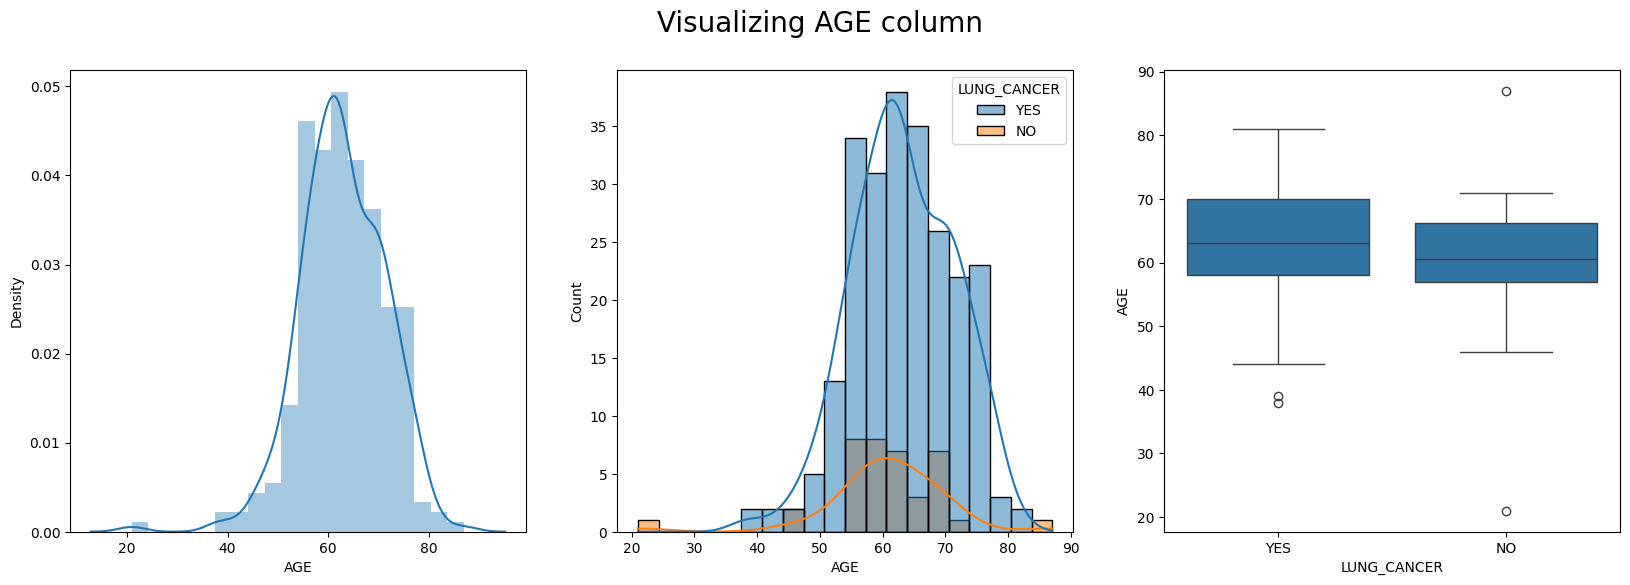

In [194]:
import warnings
warnings.filterwarnings('ignore')
fig,ax = plt.subplots(1,3,figsize=(20,6))
sns.distplot(df['AGE'],ax=ax[0])
sns.histplot(data =df,x='AGE',ax=ax[1],hue='LUNG_CANCER',kde=True)
sns.boxplot(x=df['LUNG_CANCER'],y=df['AGE'],ax=ax[2])
plt.suptitle("Visualizing AGE column",size=20)
plt.show()

The most common age ranges from 50-70.

Text(0.5, 0.98, 'Visualizing Categorical Columns')

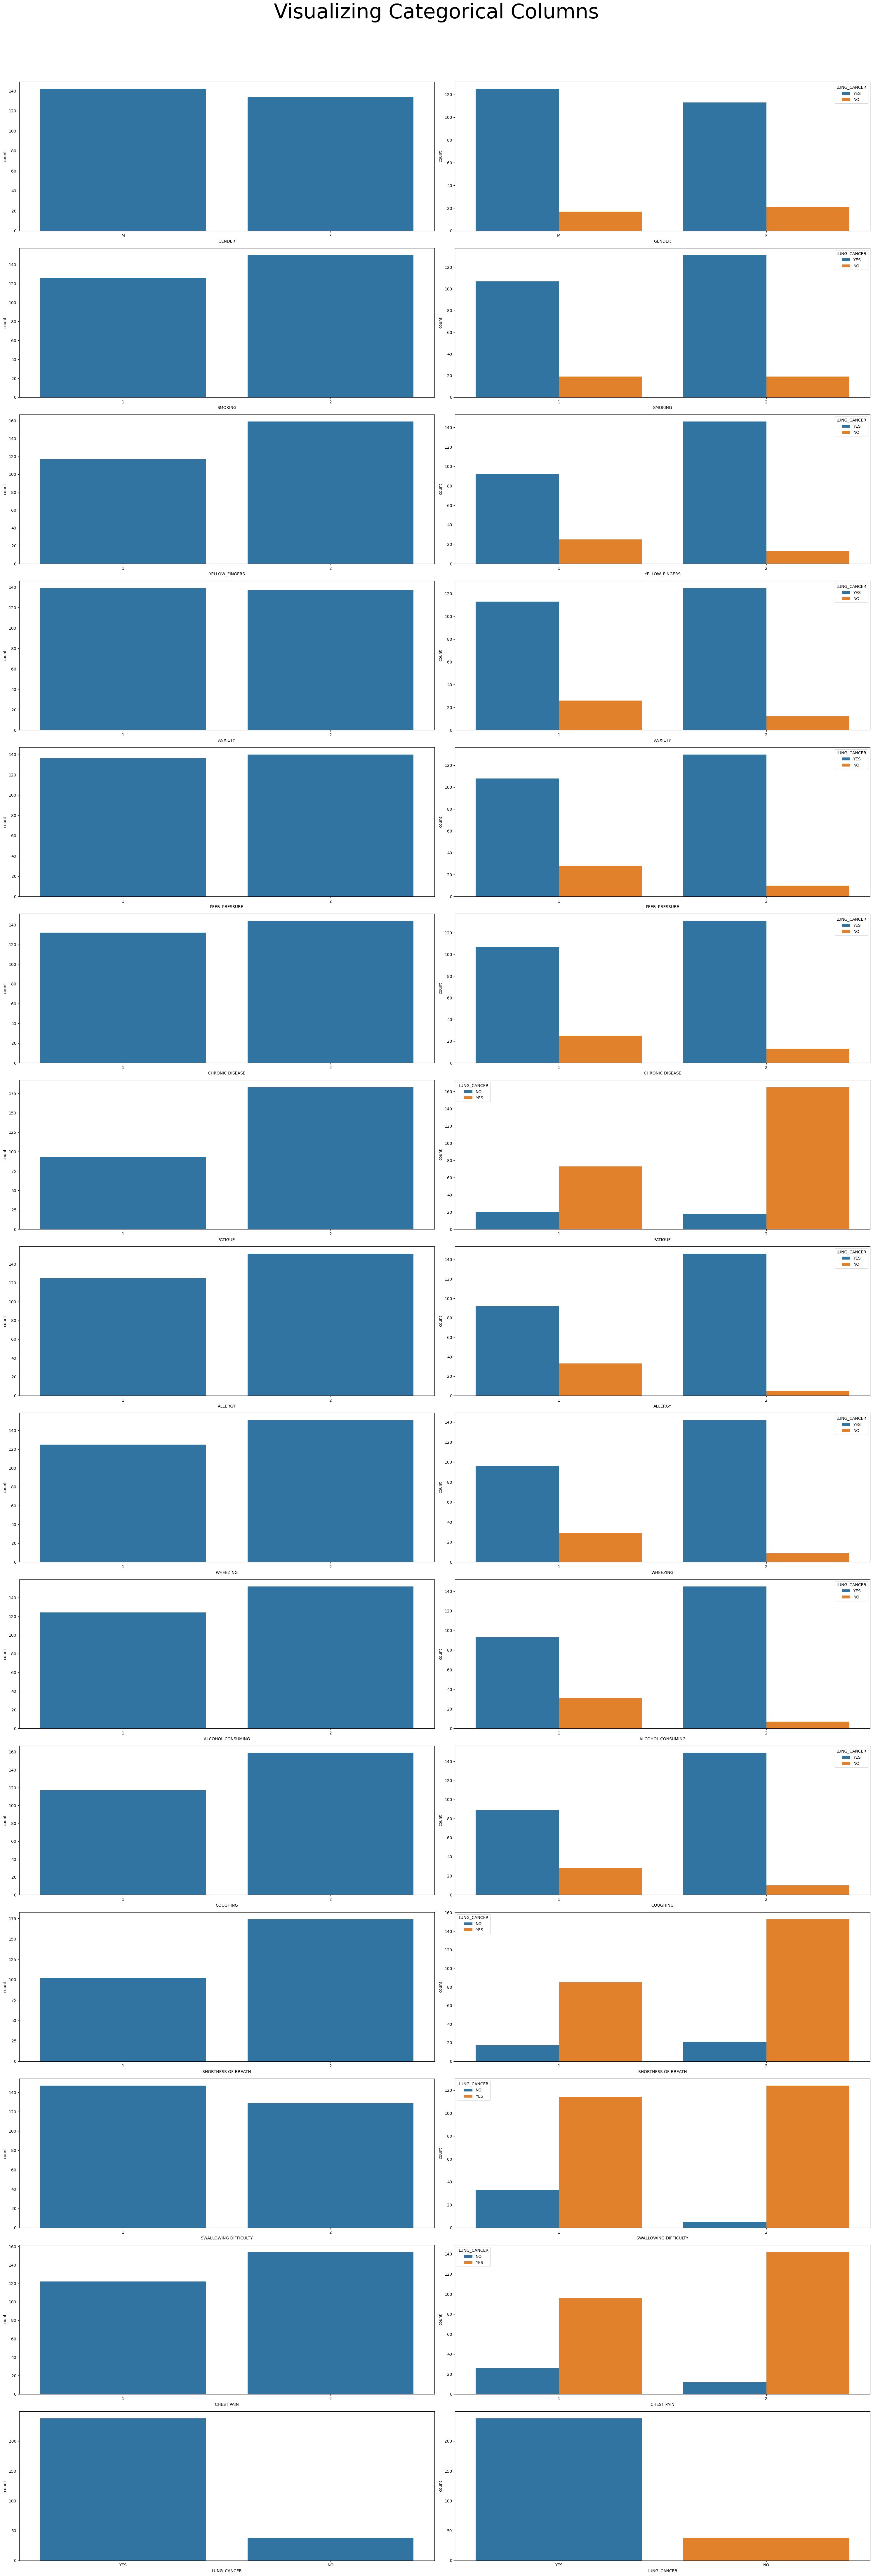

In [195]:
fig,ax = plt.subplots(15,2,figsize=(30,90))
for index,i in enumerate(cat_col):
    sns.countplot(data=df,x=i,ax=ax[index,0])
    sns.countplot(data=df,x=i,ax=ax[index,1],hue='LUNG_CANCER')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.suptitle("Visualizing Categorical Columns",fontsize=50)

### Observations:
    There is large imbalance in the dataset. Samples with Lung Cancer are present in high numbers.

Text(0.5, 0.98, 'Visualizing AGE vs Categorical Columns')

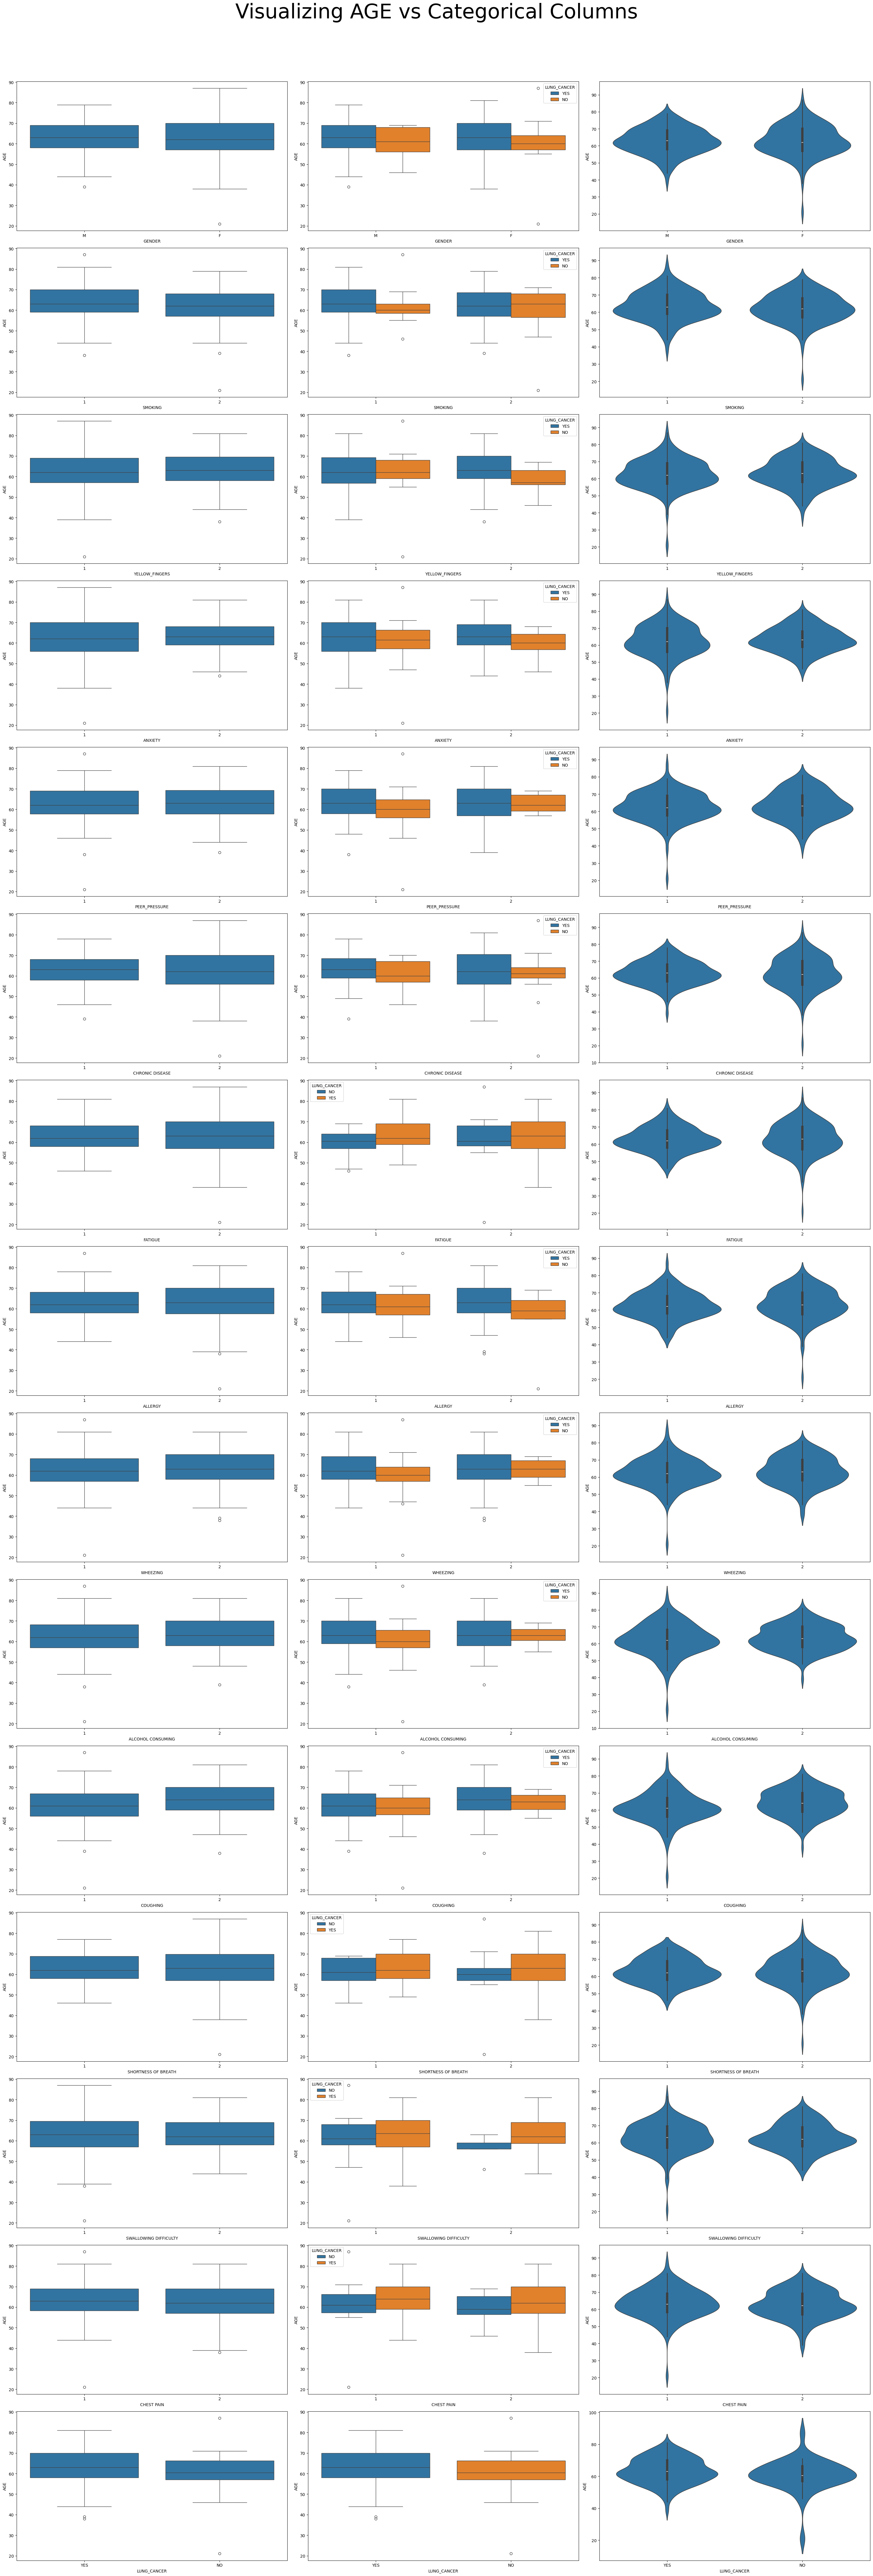

In [196]:
fig,ax = plt.subplots(15,3,figsize=(30,90))
for index,i in enumerate(cat_col):
    sns.boxplot(x=df[i],y=df['AGE'],ax=ax[index,0])
    sns.boxplot(x=df[i],y=df['AGE'],ax=ax[index,1],hue=df['LUNG_CANCER'])
    sns.violinplot(x=df[i],y=df['AGE'],ax=ax[index,2])
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.suptitle("Visualizing AGE vs Categorical Columns",fontsize=50)

In [197]:
# Encoding Categorical Columns
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['LUNG_CANCER']=encoder.fit_transform(df['LUNG_CANCER'])
df['GENDER']=encoder.fit_transform(df['GENDER'])
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


### Methods for Detecting Multicollinearity

<Axes: >

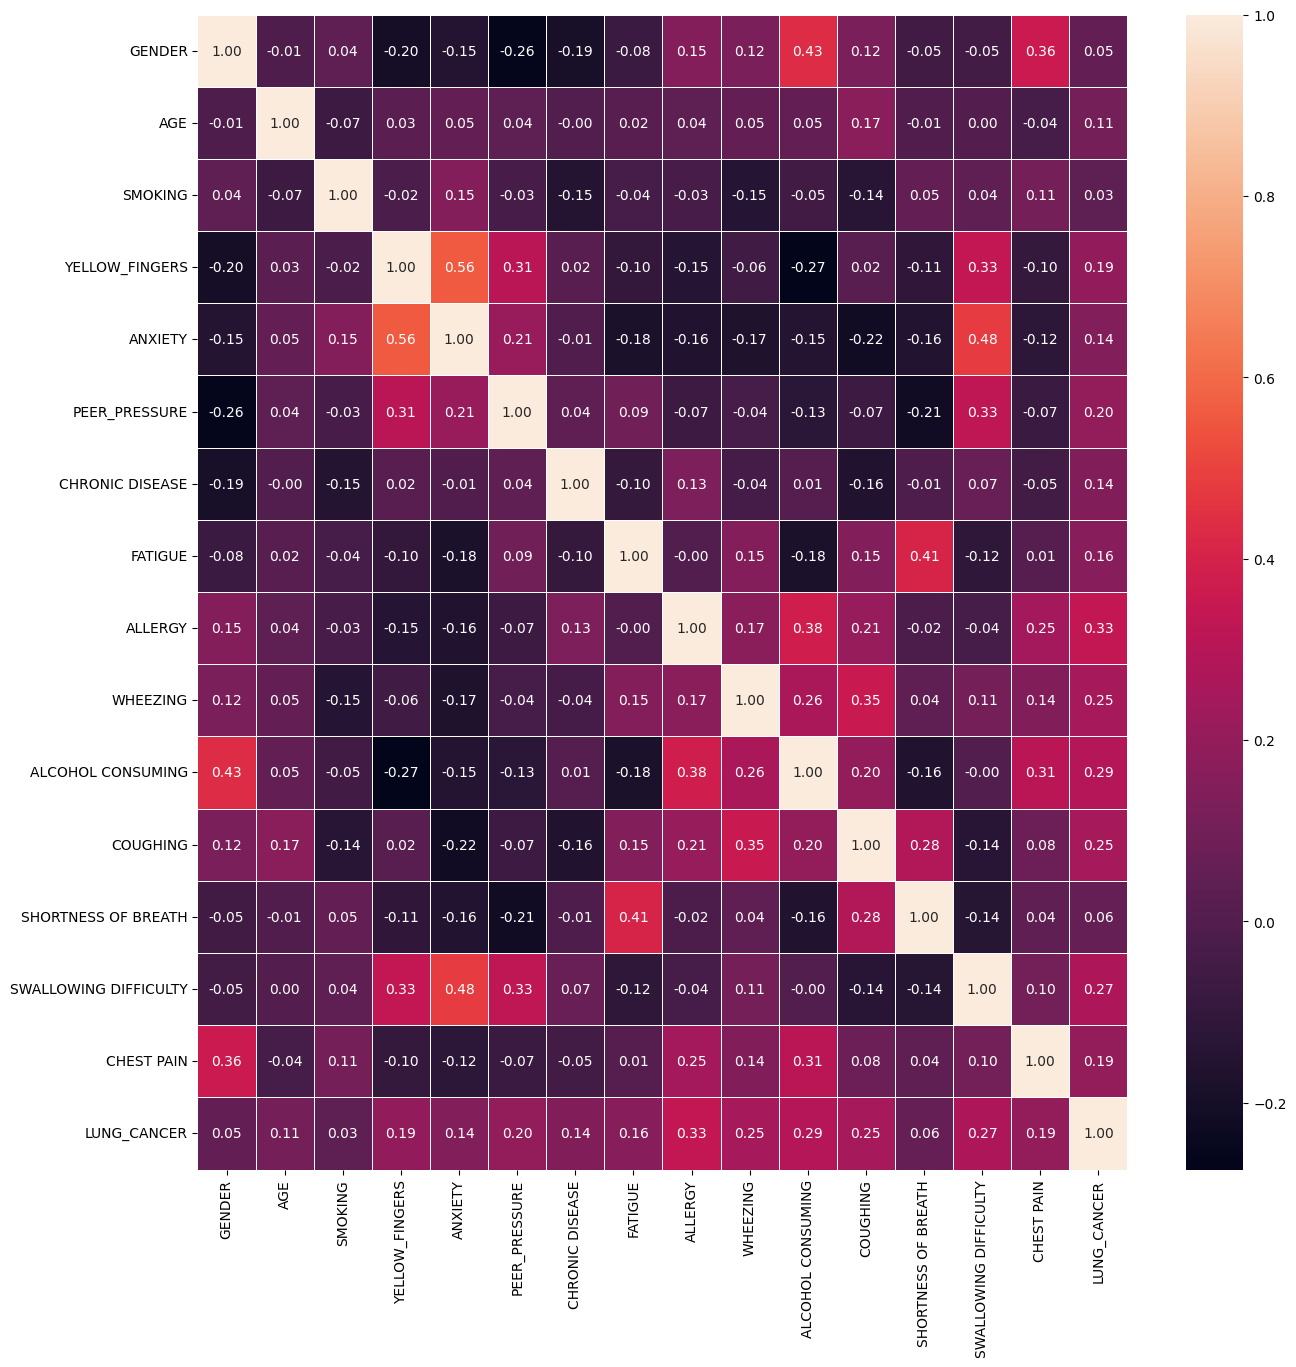

In [198]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,fmt='0.2f')

In [199]:
# Variance Inflation Factor (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np

# columns to check VIF for
vif_x = df[predictor_variables]

# create an empty dataframe
vif = pd.DataFrame()

# copy all the features of X in vif dataframe
vif["features"] = vif_x.columns

# calculate VIF for all the variables
vif["VIF Factor"] = [variance_inflation_factor(vif_x.values, i) for i in range(vif_x.shape[1])]
vif


,features,VIF Factor
0,GENDER,3.012213
1,AGE,41.961929
2,SMOKING,10.738372
3,YELLOW_FINGERS,19.138132
4,ANXIETY,19.508213
5,PEER_PRESSURE,13.564503
6,CHRONIC DISEASE,10.896006
7,FATIGUE,17.770848
8,ALLERGY,13.490502
9,WHEEZING,13.986291


In [200]:
# Eigenvalues

# Calculate the correlation matrix
correlation_matrix = vif_x.corr()

# Calculate eigenvalues
eigenvalues = np.linalg.eigvals(correlation_matrix)
eigenvalues

array([2.75828404, 1.90715148, 1.60291217, 1.35612156, 1.11979746,
       0.28906344, 0.3458775 , 0.44084869, 0.97888812, 0.91076645,
       0.807702  , 0.75045413, 0.5367936 , 0.62242437, 0.57291499])

### Observations:

From the heatmap, we can observe that there is multicollinearity present in the data. Many predictor variables have a high correlation with each other. E.g. Anxiety and yellow fingers and anxiety with swallowing difficulty. Interestingly, gender has a high correlation with alcohol consumption.

VIF measures over 5 are considered problematic, so all of the predictor variables other than gender are considered problematic.

The smaller eigenvalues represent high multicollinearity among the predictor variables. Usually, a value less than 1 indiciates high collinearity in the data. There are 3 eigenvalues which are below 0.5.
    

Multicollinearity can cause overfitting: https://www.ibm.com/topics/multicollinearity

We can use PCA to extract features, or Regularization techniques like L2 Ridge Regression to deal with it.

### Survey of Models

### Train Test Splitting

In [201]:
# first create a copy of df for our survey of models
tdf = df
from sklearn.model_selection import train_test_split
X = tdf.drop(columns = ['LUNG_CANCER'])
y = tdf['LUNG_CANCER']

# train test splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = True)

print('Training set shape: ', X_train.shape)
print('Testing set shape: ', X_test.shape)

Training set shape:  (220, 15)
Testing set shape:  (56, 15)


In [202]:
y_train

33     1
218    1
122    1
118    1
263    1
      ..
1      1
172    1
267    1
174    1
162    1
Name: LUNG_CANCER, Length: 220, dtype: int32

In [203]:
# Standard Scale the data such that each column has mean 0 and variance 1
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  

# Don't cheat - fit only on training data
scaler.fit(X_train)  
X_train = scaler.transform(X_train)  

# apply same transformation to test data
X_test = scaler.transform(X_test)

In [204]:
X_train

array([[-1.03704952,  0.49299415,  0.90453403, ...,  0.77084557,
         1.06579657,  0.8880416 ],
       [-1.03704952,  0.8713385 , -1.1055416 , ...,  0.77084557,
        -0.93826536, -1.12607337],
       [ 0.96427411, -0.76815368,  0.90453403, ...,  0.77084557,
        -0.93826536, -1.12607337],
       ...,
       [ 0.96427411, -0.38980933,  0.90453403, ..., -1.2972767 ,
         1.06579657,  0.8880416 ],
       [ 0.96427411,  1.12356806, -1.1055416 , ...,  0.77084557,
        -0.93826536,  0.8880416 ],
       [-1.03704952,  1.24968285,  0.90453403, ..., -1.2972767 ,
         1.06579657,  0.8880416 ]])

In [205]:
X_train.shape

(220, 15)

### Dimension Reduction: Projecting Data To A 2D Plane

To deal with the multicollinearity, we can try using PCA.

In [206]:
y_train

33     1
218    1
122    1
118    1
263    1
      ..
1      1
172    1
267    1
174    1
162    1
Name: LUNG_CANCER, Length: 220, dtype: int32

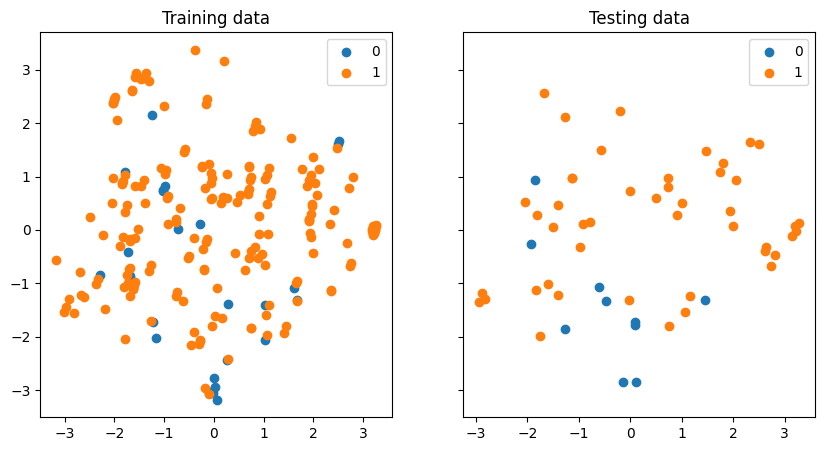

In [207]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca.fit(X_train)
X_train2D = pca.transform(X_train)
X_test2D = pca.transform(X_test)

f, axarr = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(10, 5))
for i in range(2):
      axarr[0].scatter(X_train2D[y_train == i, 0], X_train2D[y_train == i, 1], label = str(i))
                                    
      axarr[0].legend()
      axarr[0].set_title('Training data')

      axarr[1].scatter(X_test2D[y_test == i, 0], X_test2D[y_test == i, 1], label = str(i))
                                    
      axarr[1].legend()
      axarr[1].set_title('Testing data')

### Survey of Classification Models

For this survey, we will use the original dataset, not the PCA reduced 2D dataset.

### Decision Tree Classifier

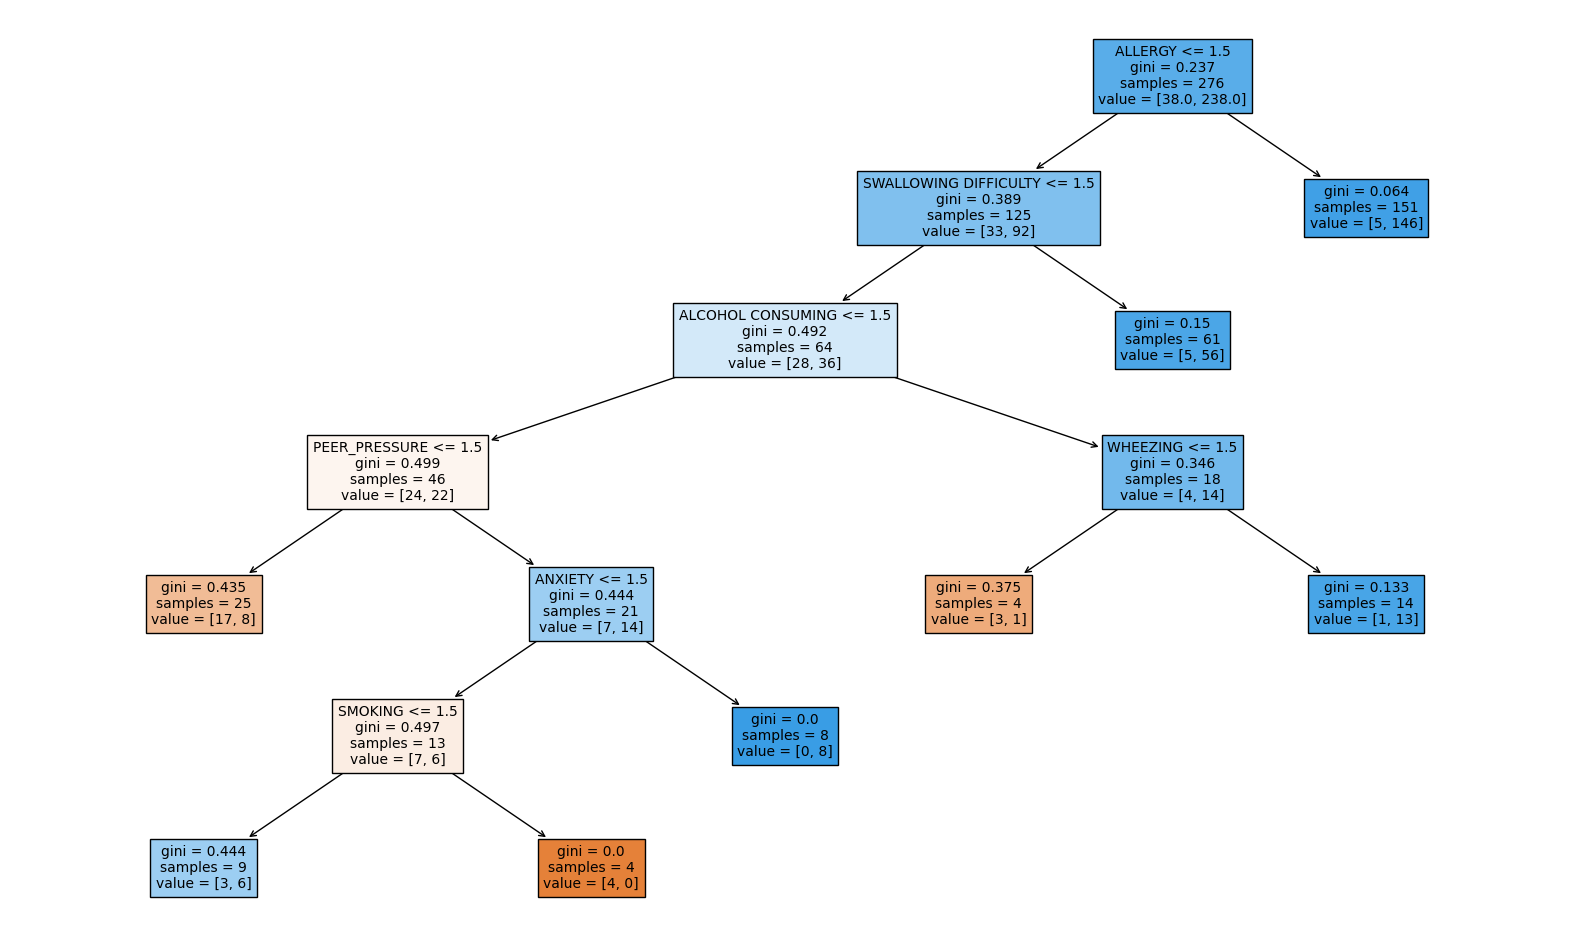

In [208]:
from sklearn import tree

# decision tree classifier
clf_tree = tree.DecisionTreeClassifier(max_leaf_nodes = 8) #limits amount of leafs nodes
clf_tree.fit(X, y)  #fitting to the data

plt.figure(figsize = (20, 12))

# LUNG_CANCER is the target variable
tree.plot_tree(clf_tree,filled = True,fontsize=10,feature_names = [
    'GENDER',
    'AGE',                 
    'SMOKING',
    'YELLOW_FINGERS',
    'ANXIETY',
    'PEER_PRESSURE',
    'CHRONIC DISEASE',
    'FATIGUE',
    'ALLERGY',
    'WHEEZING',
    'ALCOHOL CONSUMING',
    'COUGHING',
    'SHORTNESS OF BREATH',
    'SWALLOWING DIFFICULTY',
    'CHEST PAIN'])
plt.show()

### Logistic Regression

In [209]:
from sklearn.linear_model import LogisticRegression

#fit the model
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [210]:
predictions = logmodel.predict(X_test)
predictions

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1])

### Neural Network

In [221]:
from sklearn.neural_network import MLPClassifier

# MultiLayer Perceptron
nn = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(3, 5), random_state=5)

nn.fit(X_train, y_train)

print('Training accuracy: ', nn.score(X_train, y_train))
print('Testing accuracy: ', nn.score(X_test, y_test))

Training accuracy:  0.9863636363636363
Testing accuracy:  0.8392857142857143


### Linear Support Vector Machine

In [212]:
from sklearn.svm import SVC

SVM=SVC(kernel = 'linear')
SVM.fit(X_train,y_train)

print('Training accuracy of SVM: ', SVM.score(X_train, y_train))
print('Testing accuracy of SVM: ', SVM.score(X_test, y_test))

Training accuracy of SVM:  0.9318181818181818
Testing accuracy of SVM:  0.9107142857142857


### Kernel Support Vector Machine

In [213]:
SVC_rbf=SVC(kernel="rbf")
SVC_rbf.fit(X_train,y_train)

print('Training accuracy of Kernel SVM: ', SVC_rbf.score(X_train, y_train))
print('Testing accuracy of Kernel SVM: ', SVC_rbf.score(X_test, y_test))

Training accuracy of Kernel SVM:  0.9363636363636364
Testing accuracy of Kernel SVM:  0.8214285714285714


In [214]:
SVM.predict(X_test)

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [215]:
SVC_rbf.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1])

### Results Visualization

In [216]:
#@title
def plot_boundary(X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
    f, axarr = plt.subplots(1, 5, sharex='col', sharey='row', figsize=(25, 5))

    for idx, clf, tt in zip([0, 1, 2, 3, 4], list(models.values()), list(models.keys())):
        # print(idx)
        clf.fit(X,y)
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        axarr[idx].contourf(xx, yy, Z, alpha=0.4)
        for i in range(2):
            axarr[idx].scatter(X[y == i, 0], X[y== i, 1], label = str(i))
                                      
        axarr[idx].legend()
        axarr[idx].set_title(tt)
    
    plt.show()

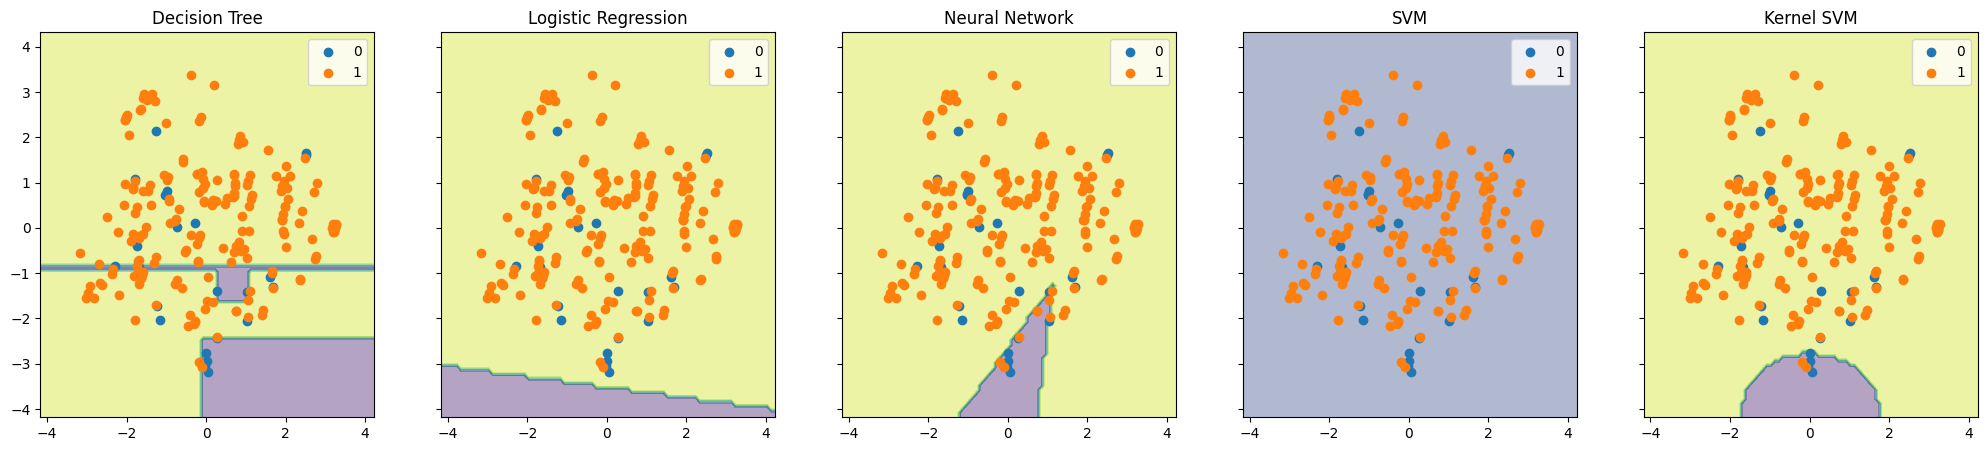

In [217]:
#@title
models = {'Decision Tree': clf_tree, 'Logistic Regression': logmodel, 'Neural Network': nn, 'SVM': SVM, 'Kernel SVM': SVC_rbf}
plot_boundary(X_train2D, y_train)

### Evaluation Of Machine Learning Models Performance

Accuracy is not a good metric when we have an imbalanced dataset where the classes are not represented equally like we have here.

<Axes: xlabel='LUNG_CANCER', ylabel='count'>

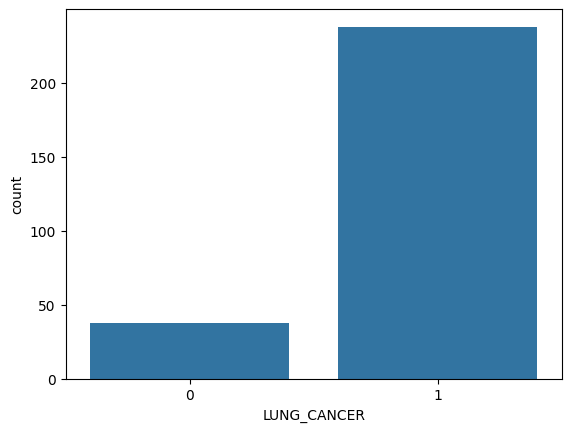

In [218]:
sns.countplot(x = 'LUNG_CANCER', data = df)

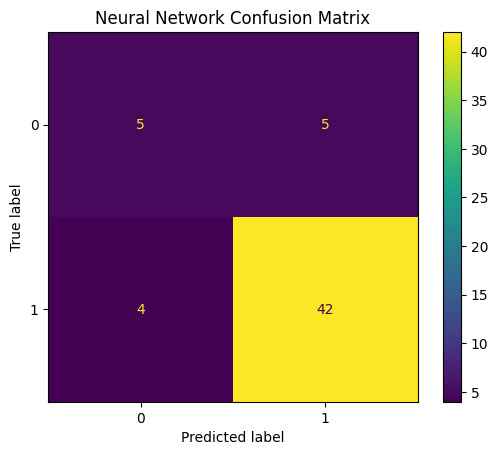

In [222]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = nn.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Neural Network Confusion Matrix')
plt.show()

The neural network had 5 True Negatives, 5 False Positives, 4 False Negative, and 42 True Positives.

**Accuracy:** what proportion of labels are correctly predicted? (Correctly predicted out of total)
     Formula = (TP + TN) / (TP + TN + FP + FN)
     83.9%

**Precision:** what proportion of labels that are predicted as 1 are actually labeled as 1? (Correctly predicted positives out of total predicted positives)
    Formula = TP / (TP + FP)
    89.4%
    (Useful when the cost of FP is high, like in cancer diagnosis)

**Recall:** what proportion of labels that are actually labeled as 1 are correctly predicted as 1? (Correctly predicted positives out of total positives)
    Formula = TP / (TP + FN)
    91.3%
    (Useful when the cost of FN is high, again like in cancer diagnosis)

### Evaluate All The Models

Decision Tree:
              precision    recall  f1-score   support

           0       0.50      0.30      0.38        10
           1       0.86      0.93      0.90        46

    accuracy                           0.82        56
   macro avg       0.68      0.62      0.64        56
weighted avg       0.80      0.82      0.80        56

*****************************************************


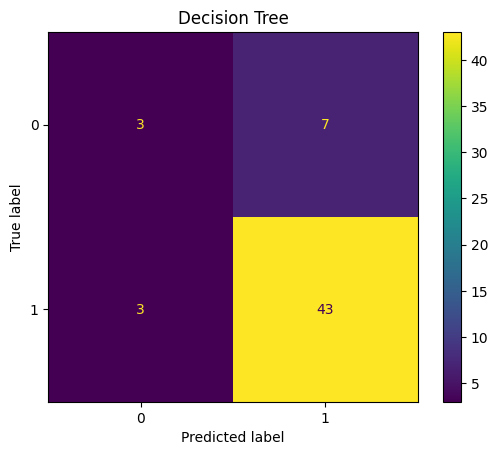

Logistic Regression:
              precision    recall  f1-score   support

           0       0.83      0.50      0.62        10
           1       0.90      0.98      0.94        46

    accuracy                           0.89        56
   macro avg       0.87      0.74      0.78        56
weighted avg       0.89      0.89      0.88        56

*****************************************************


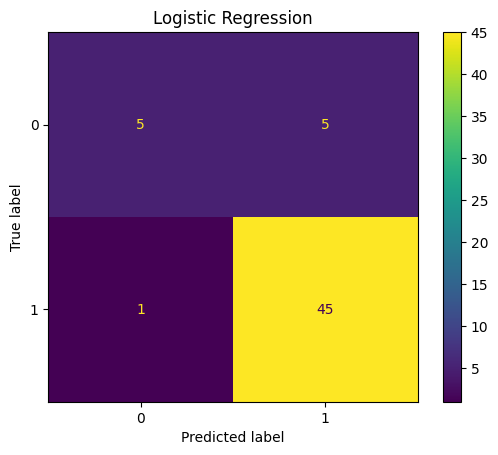

Neural Network:
              precision    recall  f1-score   support

           0       0.56      0.50      0.53        10
           1       0.89      0.91      0.90        46

    accuracy                           0.84        56
   macro avg       0.72      0.71      0.71        56
weighted avg       0.83      0.84      0.84        56

*****************************************************


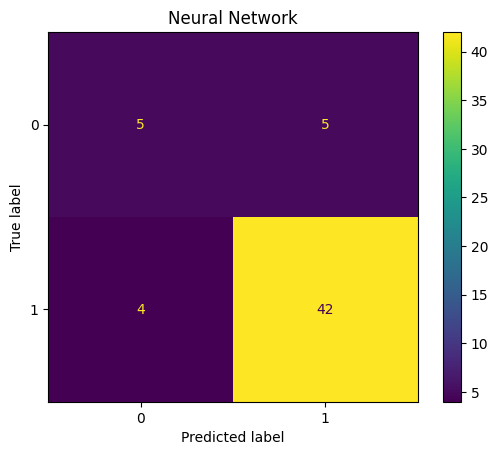

SVM:
              precision    recall  f1-score   support

           0       0.86      0.60      0.71        10
           1       0.92      0.98      0.95        46

    accuracy                           0.91        56
   macro avg       0.89      0.79      0.83        56
weighted avg       0.91      0.91      0.90        56

*****************************************************


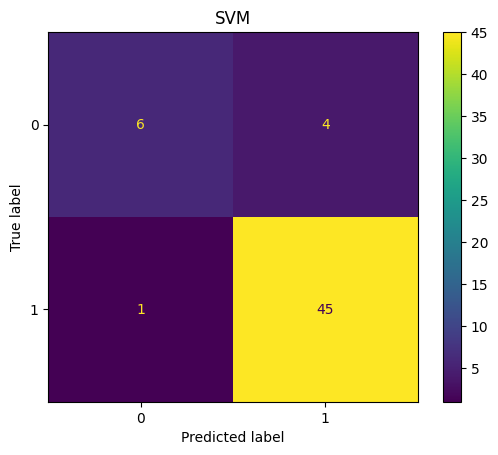

Kernel SVM:
              precision    recall  f1-score   support

           0       0.50      0.10      0.17        10
           1       0.83      0.98      0.90        46

    accuracy                           0.82        56
   macro avg       0.67      0.54      0.53        56
weighted avg       0.77      0.82      0.77        56

*****************************************************


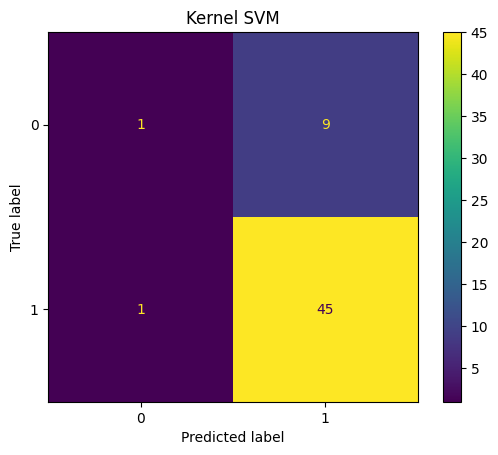

In [223]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

predicts = {}

for model_name, model in models.items():
    # Fit the model using the training data
    model.fit(X_train, y_train)
    
    # Make predictions using the test data
    y_pred = model.predict(X_test)
    
    # Store the predictions for this model
    predicts[model_name] = y_pred
    
    # Print the classification report
    print(f'{model_name}:')
    print(classification_report(y_test, y_pred))
    print('*****************************************************')
    
    # Compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()
    plt.title(model_name)
    plt.show()

Given these evalation results, Linear SVM seems to be the best model here. It has a 90% weighted average F1-score, which accounts for class imbalances with weighting.

**Model Performance:**  
    Precision of 86% for class 0, meaning there are 14% false positives for "no cancer".  
    Recall of 60% for class 0, meaning that it correctly identifies 60% of the actual "no cancer" cases. It misses 40% of the "no cancer" cases and identifies them as "has cancer".  
    Precision of 92% for class 1, meaning that 92% of cancer identifications were correct, with 8% false positives for "has cancer".  
    Recall of 98% means that there were 2% false negatives for "has cancer". This is the most important metric for cancer classification.  

In cancer classification, the priority is to minimize false negatives for "has cancer". This is the best performing model based on our evaluation criteria.

### Optimization With Oversampling

This time, we will address the imbalanced classes by oversampling of minority classes using the imblearn module. We will follow along the Kaggle notebook example by Harshit Gupta to see how his implementation can improve our performance: https://www.kaggle.com/code/casper6290/lung-cancer-prediction-98

### Model Building

In [224]:
# Separating Independent and Dependent Features
X=df.drop(['LUNG_CANCER'],axis=1)
y=df['LUNG_CANCER']

# Changing values of columns from 2,1 to 1,0
for i in X.columns[2:]:
    temp=[]
    for j in X[i]:
        temp.append(j-1)
    X[i]=temp
X.head()

# Oversampling of Minority Class
from imblearn.over_sampling import RandomOverSampler
X_over,y_over=RandomOverSampler().fit_resample(X,y)

# Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_over,y_over,random_state=42,stratify=y_over)
print(f'Train shape : {X_train.shape}\nTest shape: {X_test.shape}')

# Scaling of AGE columns
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train['AGE']=scaler.fit_transform(X_train[['AGE']])
X_test['AGE']=scaler.transform(X_test[['AGE']])
X_train.head()

Train shape : (357, 15)
Test shape: (119, 15)


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
321,1,-0.824475,1,0,0,0,0,1,1,0,0,0,1,0,1
336,1,0.189317,1,0,0,0,0,0,1,1,1,1,0,0,1
334,0,0.076673,0,0,0,0,1,1,0,0,0,0,1,0,0
151,0,0.189317,1,1,0,1,1,0,0,0,0,0,0,0,0
314,0,0.076673,0,1,0,0,0,0,0,1,0,1,1,0,0


Evaluation Metric:

Metric: Recall

Recall = TruePositives(TruePositives + FalseNegatives)
 
Recall is the best metric because here were are concerned about reducing False Negatives. I.e. measuring how many Lung Cancer Patients were missclassified as Non Lung Cancer.

### K Neighbors Classifier

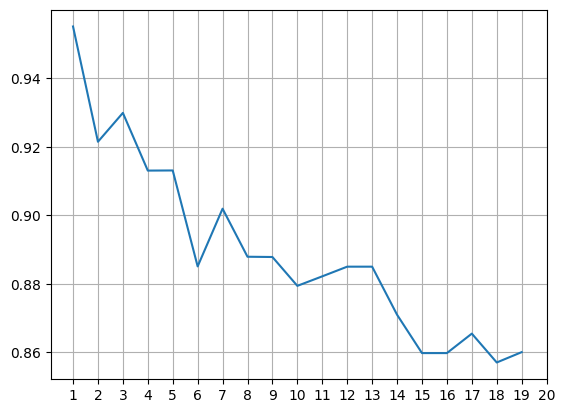

In [225]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
knn_scores=[]
for k in range(1,20):
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,X_train,y_train,cv=5)
    knn_scores.append(scores.mean())

x_ticks = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
x_labels = x_ticks

plt.plot([k for k in range(1,20)],knn_scores)
plt.xticks(ticks=x_ticks, labels=x_labels)
plt.grid()

              precision    recall  f1-score   support

           0       0.88      1.00      0.94        60
           1       1.00      0.86      0.93        59

    accuracy                           0.93       119
   macro avg       0.94      0.93      0.93       119
weighted avg       0.94      0.93      0.93       119



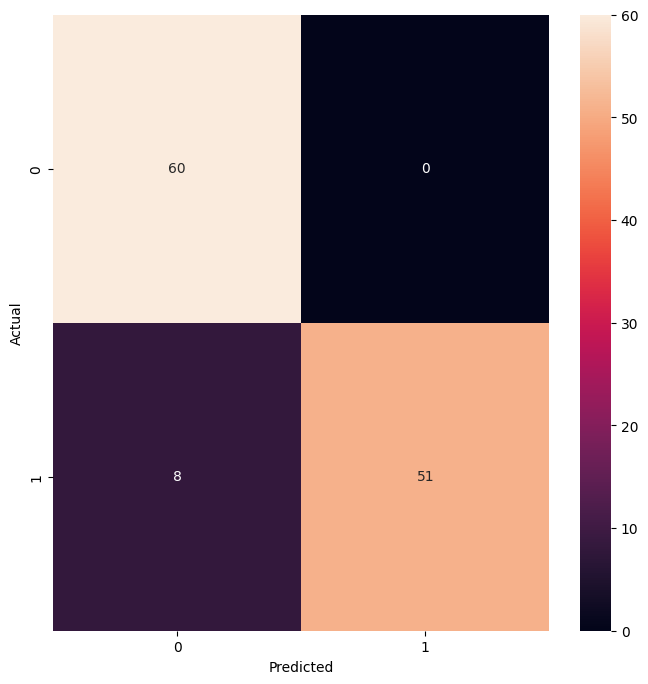

In [226]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
from sklearn.metrics import confusion_matrix
confusion_knn=confusion_matrix(y_test,knn.predict(X_test))
plt.figure(figsize=(8,8))
sns.heatmap(confusion_knn,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
from sklearn.metrics import classification_report
print(classification_report(y_test,knn.predict(X_test)))

### Support Vector Machine

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        60
           1       1.00      0.93      0.96        59

    accuracy                           0.97       119
   macro avg       0.97      0.97      0.97       119
weighted avg       0.97      0.97      0.97       119


Best Parameters of SVC model is : {'gamma': 1, 'C': 100}



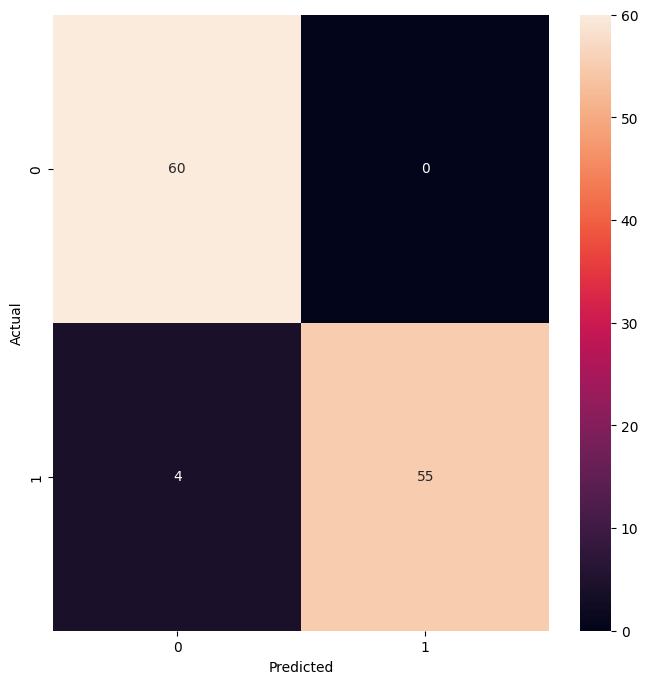

In [227]:
param_grid={'C':[0.001,0.01,0.1,1,10,100], 'gamma':[0.001,0.01,0.1,1,10,100]}
rcv=RandomizedSearchCV(SVC(),param_grid,cv=5)
rcv.fit(X_train,y_train)
y_pred_svc=rcv.predict(X_test)
confusion_svc=confusion_matrix(y_test,rcv.predict(X_test))
plt.figure(figsize=(8,8))
sns.heatmap(confusion_svc,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test,y_pred_svc))
print(f'\nBest Parameters of SVC model is : {rcv.best_params_}\n')

### Logistic Regression

              precision    recall  f1-score   support

           0       0.89      0.92      0.90        60
           1       0.91      0.88      0.90        59

    accuracy                           0.90       119
   macro avg       0.90      0.90      0.90       119
weighted avg       0.90      0.90      0.90       119



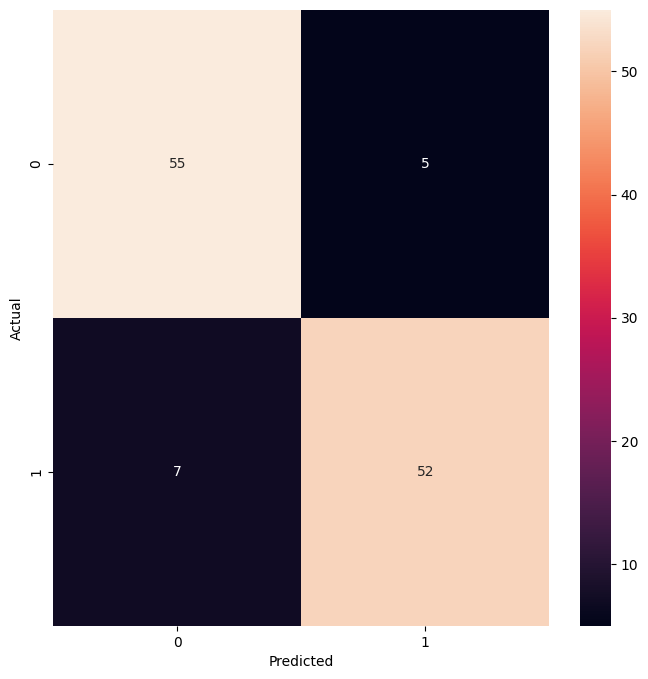

In [228]:
param_grid={'C':[0.001,0.01,0.1,1,10,100], 'max_iter':[50,75,100,200,300,400,500,700]}
log=RandomizedSearchCV(LogisticRegression(solver='lbfgs'),param_grid,cv=5)
log.fit(X_train,y_train)
y_pred_log=log.predict(X_test)
confusion_log=confusion_matrix(y_test,log.predict(X_test))
plt.figure(figsize=(8,8))
sns.heatmap(confusion_log,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test,y_pred_log))

### Random Forest Classifier

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        60
           1       1.00      0.90      0.95        59

    accuracy                           0.95       119
   macro avg       0.95      0.95      0.95       119
weighted avg       0.95      0.95      0.95       119


Best Parameter: {'n_estimators': 75}



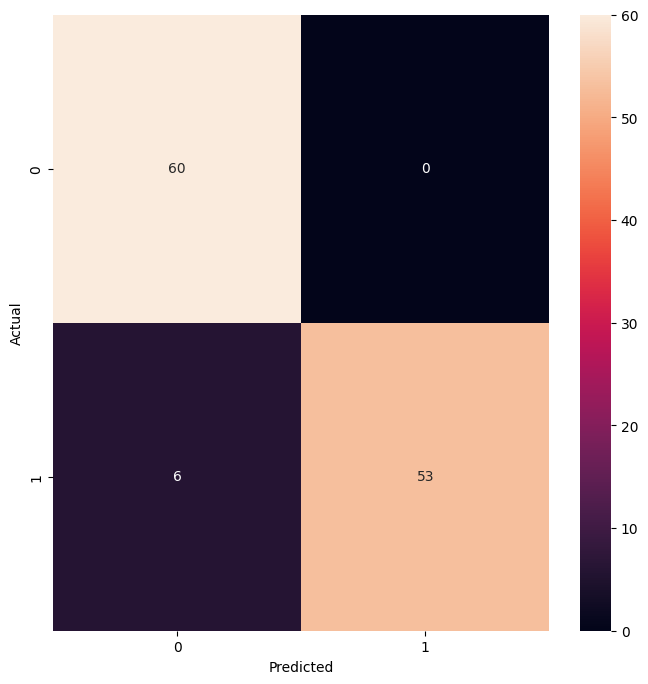

In [229]:
param_grid = {
'n_estimators': [50, 75,100, 150, 200,300],
}
rcv=RandomizedSearchCV(RandomForestClassifier(random_state=42),param_grid,cv=5)
rcv.fit(X_train,y_train)
y_pred_rcv=rcv.predict(X_test)
confusion_rcv=confusion_matrix(y_test,rcv.predict(X_test))
plt.figure(figsize=(8,8))
sns.heatmap(confusion_rcv,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test,y_pred_rcv))
print(f'\nBest Parameter: {rcv.best_params_}\n')

### Gradient Boosting Classifier

              precision    recall  f1-score   support

           0       0.88      1.00      0.94        60
           1       1.00      0.86      0.93        59

    accuracy                           0.93       119
   macro avg       0.94      0.93      0.93       119
weighted avg       0.94      0.93      0.93       119


Best Parameter: {'n_estimators': 300, 'learning_rate': 0.25}



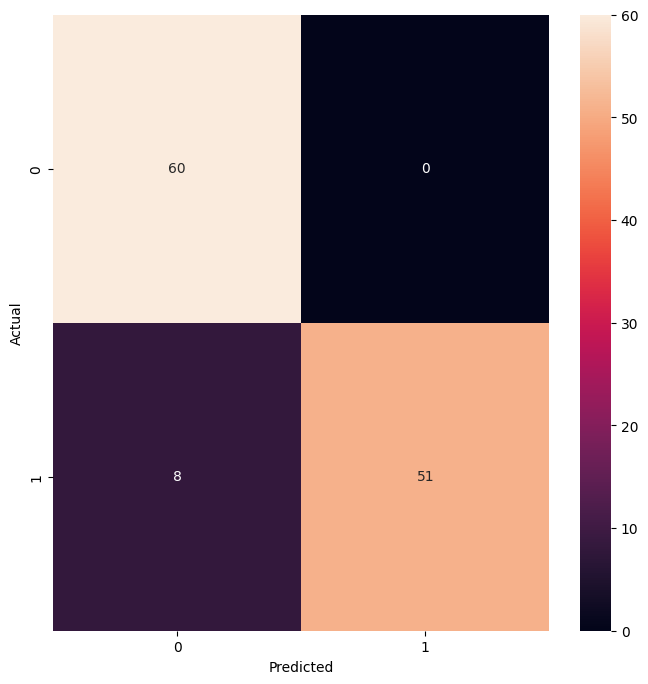

In [230]:
from sklearn.ensemble import GradientBoostingClassifier
param_grid = {
    'learning_rate' : [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1],
    'n_estimators': [50, 75,100, 150, 200,300],
}

gbc=RandomizedSearchCV(GradientBoostingClassifier(random_state=42),param_grid,cv=5)
gbc.fit(X_train,y_train)
y_pred_gbc=gbc.predict(X_test)
confusion_gbc=confusion_matrix(y_test,y_pred_gbc)
plt.figure(figsize=(8,8))
sns.heatmap(confusion_gbc,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test,y_pred_gbc))
print(f'\nBest Parameter: {gbc.best_params_}\n')

### Selected Model: SVC

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        60
           1       1.00      0.97      0.98        59

    accuracy                           0.98       119
   macro avg       0.98      0.98      0.98       119
weighted avg       0.98      0.98      0.98       119



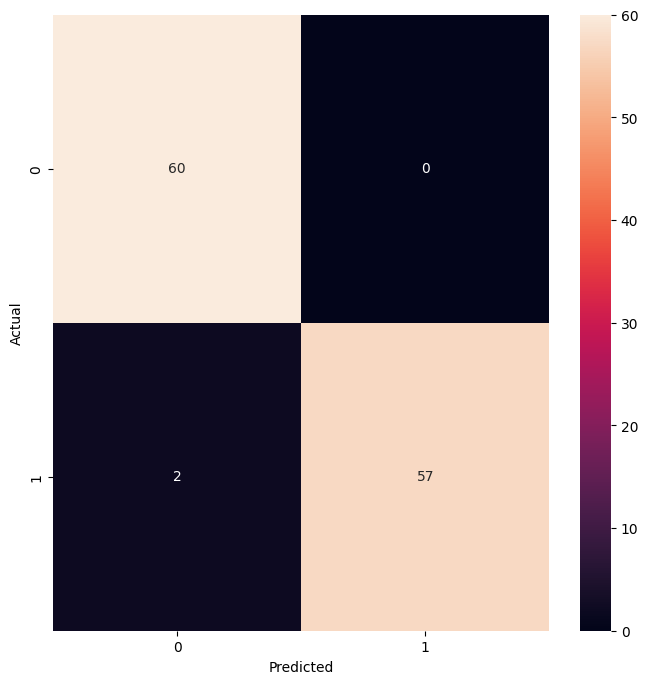

In [231]:
model = SVC(gamma=10,C=100)
model.fit(X_train,y_train)
y_pred_svc=model.predict(X_test)
confusion_svc=confusion_matrix(y_test,y_pred_svc)
plt.figure(figsize=(8,8))
sns.heatmap(confusion_svc,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test,y_pred_svc))

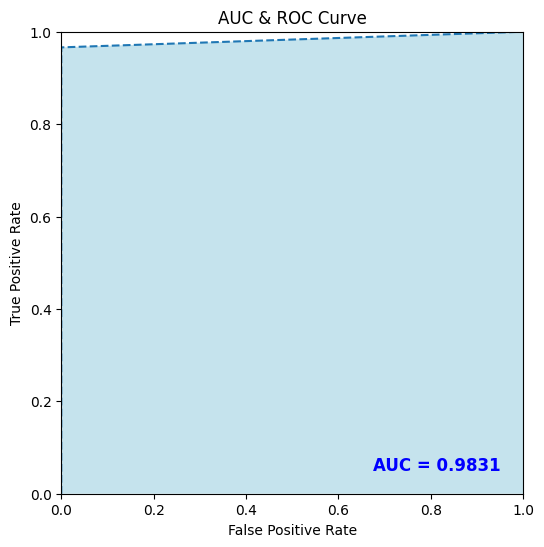

In [232]:
from sklearn import metrics
auc = metrics.roc_auc_score(y_test, y_pred_svc)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_pred_svc)

plt.figure(figsize=(6, 6), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate,'--' )
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightblue', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

### Conclusion

Support Vector Machine is the best model for the task based on our evaluation criteria.

Using Oversampling, we have improved the Recall for class 0 from 60% to 100%, resulting in the model making no false negative classifications for "no cancer". This is a significant improvement for cancer classification. The Recall for "has cancer" dropped by 1%, but this trade-off may be acceptable for the overall performance improvement. More testing and evaluation is necessary.

Evaluation:
- Recall - 97%
- Accuracy - 98%
- It has only two (FP) missclassifications for class 1.
- AUC - 0.9831

### References

Dataset: https://www.kaggle.com/datasets/mysarahmadbhat/lung-cancer  
Data Science at Georgia Tech Bootcamp: https://dsgtbootcamp.netlify.app/  
IBM Multicollinearity: https://www.ibm.com/topics/multicollinearity  
Hex Detecting and Remedying Multicollinearity: https://hex.tech/blog/detecting-and-remedying-multicollinearity/  
Lung Cancer Prediction Kaggle Notebook: https://www.kaggle.com/code/casper6290/lung-cancer-prediction-98